# Supply Chain Data Set

## Exploratory Data Analysis

### Uploading the new CSV and Working

In [1]:
# Importing all header files necessary for the run
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reads the file having the Cleaned Dataset
ds = pd.read_csv('Cleaned_DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')

In [3]:
# Displays first five values of Cleaned Dataset
ds.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Customer Id,Customer Segment,Department Name,Market,...,Sales,Order Region,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,BenefitBracket,Order Item Discount Bracket,Product Price Bracket,Sales Bracket
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,20755,Consumer,Fitness,Pacific Asia,...,327.75,Southeast Asia,COMPLETE,Smart watch,2018-02-03 22:56:00,Standard Class,Profit,<10%,<500,<500
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,19492,Consumer,Fitness,Pacific Asia,...,327.75,South Asia,PENDING,Smart watch,2018-01-18 12:27:00,Standard Class,Loss,<10%,<500,<500
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,19491,Consumer,Fitness,Pacific Asia,...,327.75,South Asia,CLOSED,Smart watch,2018-01-17 12:06:00,Standard Class,Loss,<10%,<500,<500
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,19490,Home Office,Fitness,Pacific Asia,...,327.75,Oceania,COMPLETE,Smart watch,2018-01-16 11:45:00,Standard Class,Profit,<10%,<500,<500
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,19489,Corporate,Fitness,Pacific Asia,...,327.75,Oceania,PENDING_PAYMENT,Smart watch,2018-01-15 11:24:00,Standard Class,Profit,<10%,<500,<500


In [4]:
# Displays the columns of the CLeaned Dataset
ds.columns

Index(['Type', 'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Name', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Department Name', 'Market', 'Order Country', 'order date (DateOrders)',
       'Order Item Discount Rate', 'Order Item Product Price', 'Sales',
       'Order Region', 'Order Status', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'BenefitBracket',
       'Order Item Discount Bracket', 'Product Price Bracket',
       'Sales Bracket'],
      dtype='object')

In [5]:
# Displays the information about the Cleaned Dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type                         180519 non-null  object 
 1   Benefit per order            180519 non-null  float64
 2   Delivery Status              180519 non-null  object 
 3   Late_delivery_risk           180519 non-null  int64  
 4   Category Name                180519 non-null  object 
 5   Customer Country             180519 non-null  object 
 6   Customer Id                  180519 non-null  int64  
 7   Customer Segment             180519 non-null  object 
 8   Department Name              180519 non-null  object 
 9   Market                       180519 non-null  object 
 10  Order Country                180519 non-null  object 
 11  order date (DateOrders)      180519 non-null  object 
 12  Order Item Discount Rate     180519 non-null  float64
 13 

In [6]:
# Displays the statistical data about the Cleaned Dataset
ds.describe()

,Benefit per order,Late_delivery_risk,Customer Id,Order Item Discount Rate,Order Item Product Price,Sales
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,21.974989,0.548291,6691.379495,0.101668,141.232550,203.772096
std,104.433526,0.497664,4162.918106,0.070415,139.732492,132.273077
min,-4274.979980,0.000000,1.000000,0.000000,9.990000,9.990000
25%,7.000000,0.000000,3258.500000,0.040000,50.000000,119.980003
50%,31.520000,1.000000,6457.000000,0.100000,59.990002,199.919998
75%,64.800003,1.000000,9779.000000,0.160000,199.990005,299.950012
max,911.799988,1.000000,20757.000000,0.250000,1999.989990,1999.989990


### Correlation Matrix between Columns from Cleaned Dataset

<AxesSubplot:>

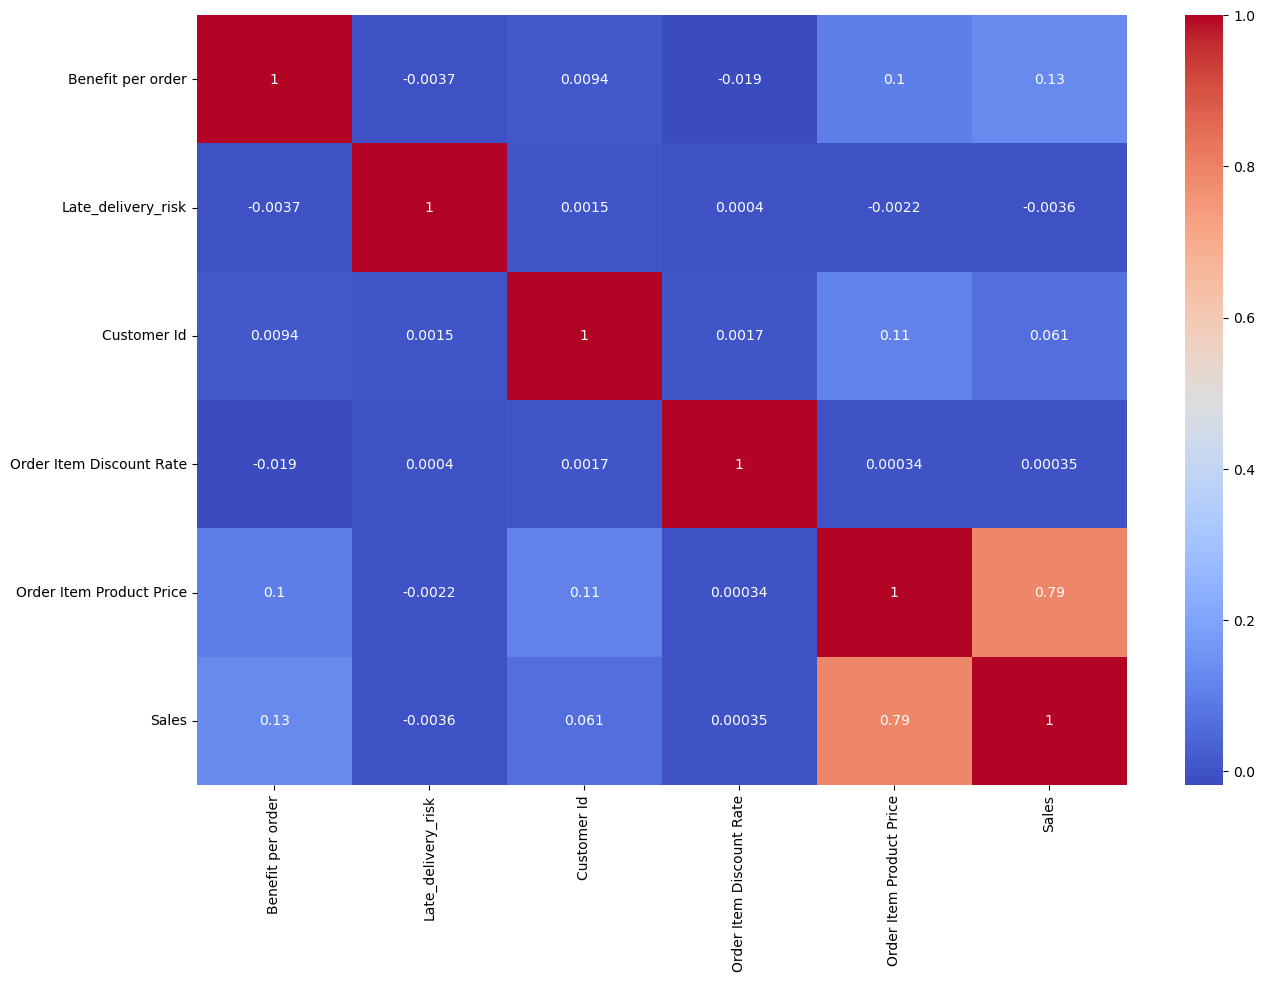

In [7]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(ds.corr(), cmap = 'coolwarm', annot = True, ax = ax)

## 1. Delivery Analysis with respect to Payment Type, Customer Country and Customer Segment

### 1.1. Distribution of Mode of Payment by Customers

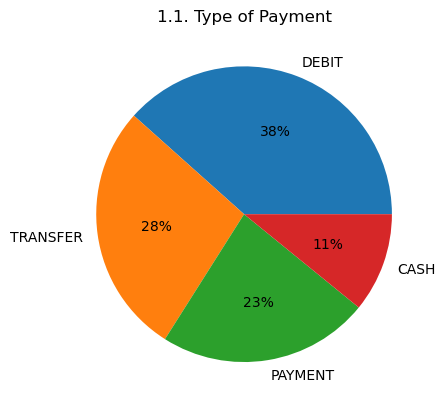

In [8]:
plt.pie(ds.Type.value_counts().values,labels=ds.Type.value_counts().index,  autopct='%.0f%%')
plt.title("1.1. Type of Payment")
plt.show()

### 1.2. Distribution of Mode of Payment with respect to Delivery Status

Text(0.5, 1.0, '1.2. Type of Payment and Delivery Status')

<Figure size 2000x1000 with 0 Axes>

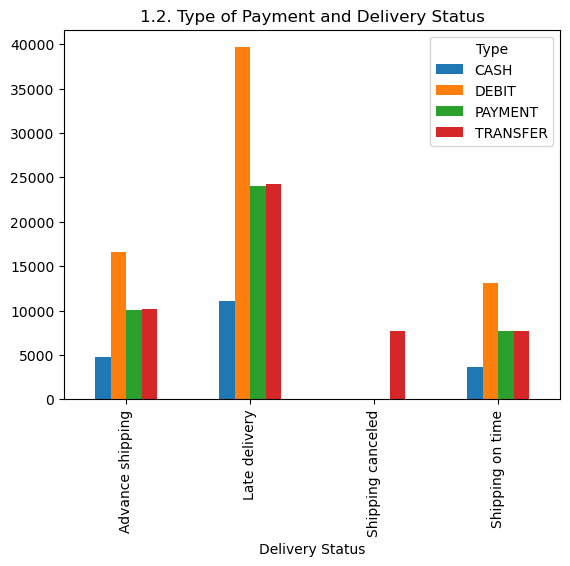

In [9]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Delivery Status','Type'])['Sales'].count()
ds1.unstack(level=1).plot.bar()
plt.title("1.2. Type of Payment and Delivery Status")

### 1.3. Distribution of Mode of Payment with respect to Delivery Status and Customer Country

<AxesSubplot:title={'center':'1.3. Type, Delivery Status and Customer Country'}, ylabel='Delivery Status,Customer Country'>

<Figure size 2000x1000 with 0 Axes>

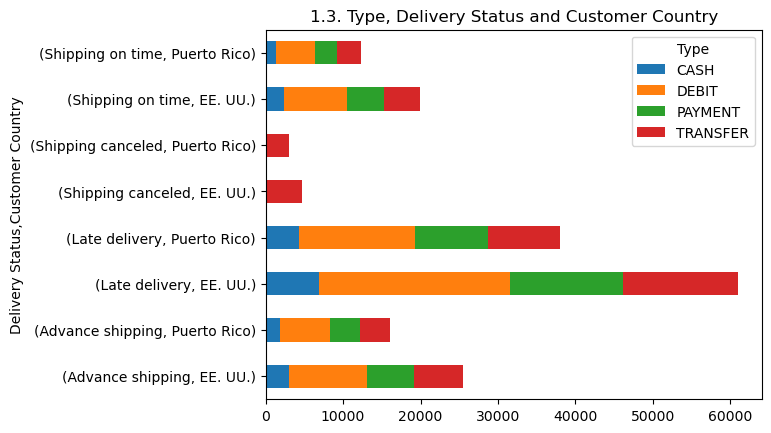

In [10]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Delivery Status','Type', 'Customer Country'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='1.3. Type, Delivery Status and Customer Country')

### 1.4. Distribution of Mode of Payment with respect to Delivery Status and Customer Segment

<AxesSubplot:title={'center':'1.4. Type, Delivery Status and Customer Segment'}, ylabel='Delivery Status,Customer Segment'>

<Figure size 2000x1000 with 0 Axes>

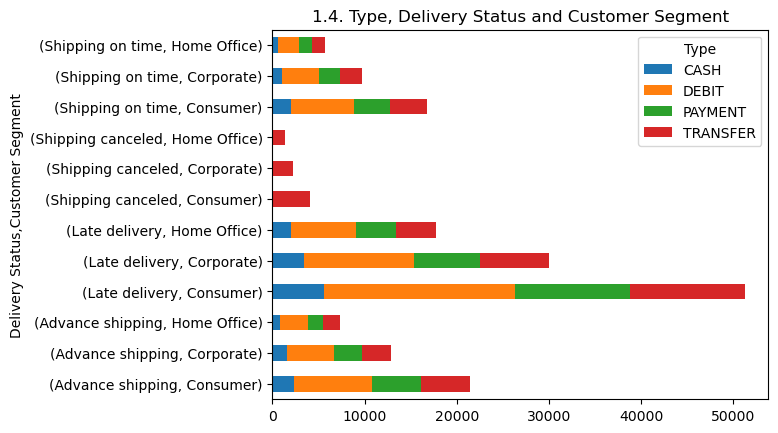

In [11]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Delivery Status','Type', 'Customer Segment'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='1.4. Type, Delivery Status and Customer Segment')

#### Observation:

<b>1.1:</b> Most of the customers have preferred to use debit cards for their purchase or order transactions. 

<b>1.2:</b> Shipping cancellations have happened mostly for the payment made through money transfers.

<b>1.3:</b> The overall productivity or sales is more in EE.UU.

<b>1.4:</b> The customers seems to be more from Consumer segment.

## 2. Profit Loss Analysis with respect to Mode of Shipment, Customer Country and Customer Segment

### 2.1. Distribution of Profit and Loss per Order

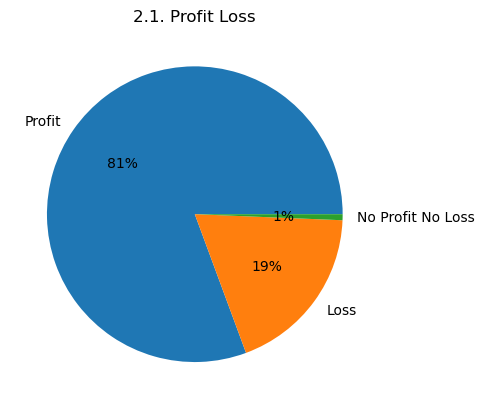

In [12]:
plt.pie(ds["BenefitBracket"].value_counts().values,labels=ds["BenefitBracket"].value_counts().index,  autopct='%.0f%%')
plt.title("2.1. Profit Loss")
plt.show()

### 2.2. Distribution of Profit and Loss per Order with respect to Mode of Shipment

Text(0.5, 1.0, '2.2. Profit Loss and Mode of Shipment')

<Figure size 2000x1000 with 0 Axes>

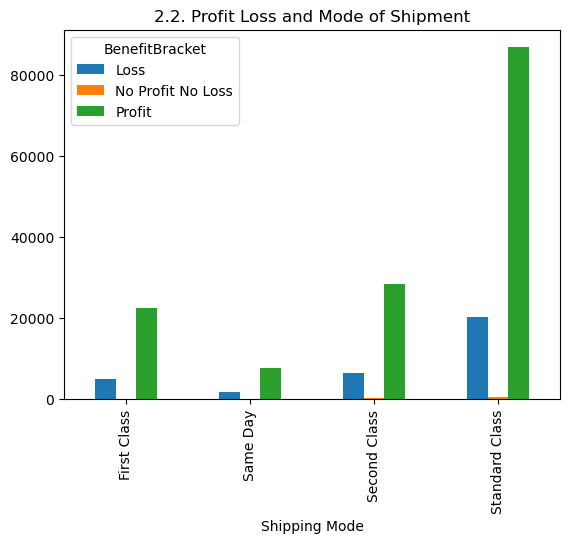

In [13]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Shipping Mode','BenefitBracket'])['Sales'].count()
ds1.unstack(level=1).plot.bar()
plt.title("2.2. Profit Loss and Mode of Shipment")

### 2.3. Distribution of Profit and Loss per Order with respect to Mode of Shipment and Customer Country

<AxesSubplot:title={'center':'2.3. Profit Loss, Mode of Shipment and Customer Country'}, ylabel='Customer Country,Shipping Mode'>

<Figure size 2000x1000 with 0 Axes>

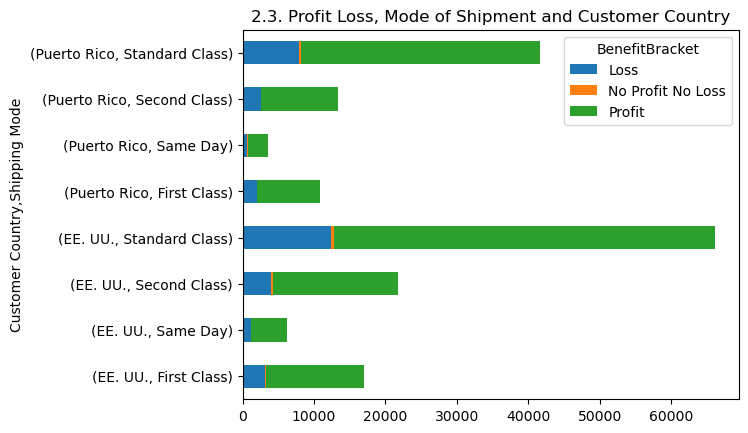

In [14]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Customer Country', 'BenefitBracket', 'Shipping Mode'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='2.3. Profit Loss, Mode of Shipment and Customer Country')

### 2.4. Distribution of Profit and Loss per Order with respect to Mode of Shipment and Customer Segment

<AxesSubplot:title={'center':'2.4. Profit Loss, Mode of Shipment and Customer Segment'}, ylabel='Customer Segment,Shipping Mode'>

<Figure size 2000x1000 with 0 Axes>

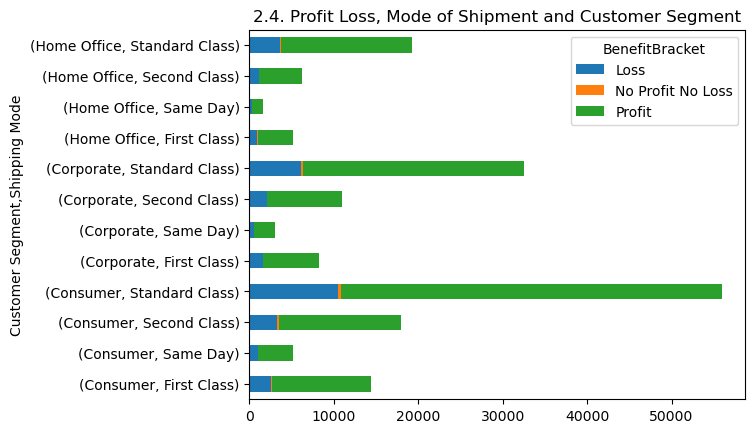

In [15]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby([ 'Customer Segment','BenefitBracket', 'Shipping Mode'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='2.4. Profit Loss, Mode of Shipment and Customer Segment')

#### Observation:

<b>2.1:</b> We can see an 81% profit percentage overall in sales. 

<b>2.2:</b> Most customers prefer standard class rather than other mode of shipments and least of them prefer same day deliveries.

<b>2.3:</b> Certain orders to both EE.UU and Puerto Rico are forced to be sold with no profit and no loss to their customers in Standard Class to meet respective sales targets.

<b>2.4:</b> All same day mode of shipments are mostly managed to gain profit in all the three segments. 

## 3. Market Analysis with respect to Order Status, Customer Country and Customer Segment

### 3.1. Distribution of Markets 

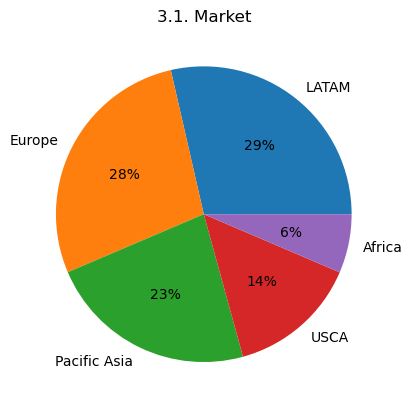

In [16]:
plt.pie(ds.Market.value_counts().values,labels=ds.Market.value_counts().index,  autopct='%.0f%%')
plt.title("3.1. Market")
plt.show()

### 3.2. Distribution of Markets with respect to Order Status

Text(0.5, 1.0, '3.2. Market and Order Status')

<Figure size 2000x1000 with 0 Axes>

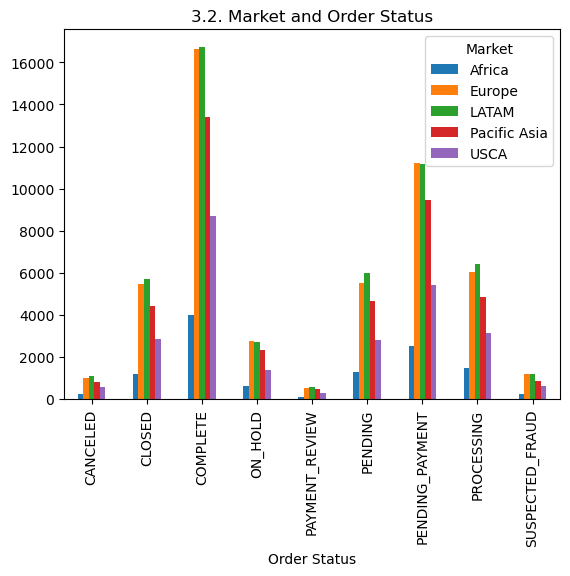

In [17]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Order Status','Market'])['Sales'].count()
ds1.unstack(level=1).plot.bar()
plt.title("3.2. Market and Order Status")

### 3.3. Distribution of Markets with respect to Order Status and Customer Country

<AxesSubplot:title={'center':'3.3. Market, Order Status and Customer Country'}, ylabel='Customer Country,Order Status'>

<Figure size 2500x1500 with 0 Axes>

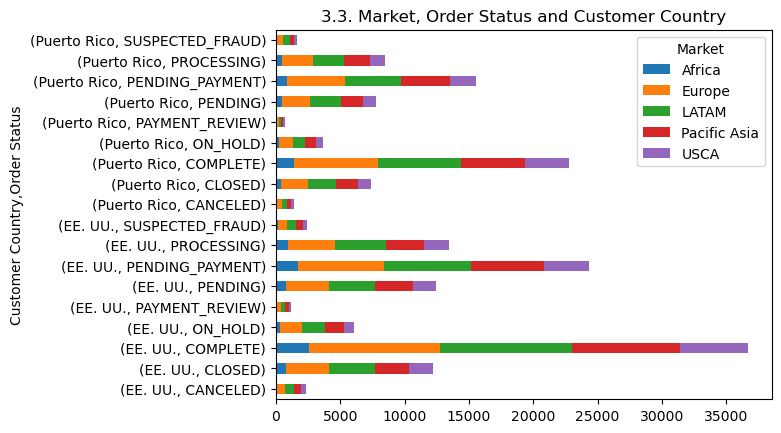

In [18]:
plt.figure(figsize=(25,15))
ds1 = ds.groupby(['Customer Country','Market', 'Order Status'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='3.3. Market, Order Status and Customer Country')

### 3.4. Distribution of Markets with respect to Order Status and Customer Segment

<AxesSubplot:title={'center':'3.4. Market, Order Status and Customer Segment'}, ylabel='Customer Segment,Order Status'>

<Figure size 2500x1500 with 0 Axes>

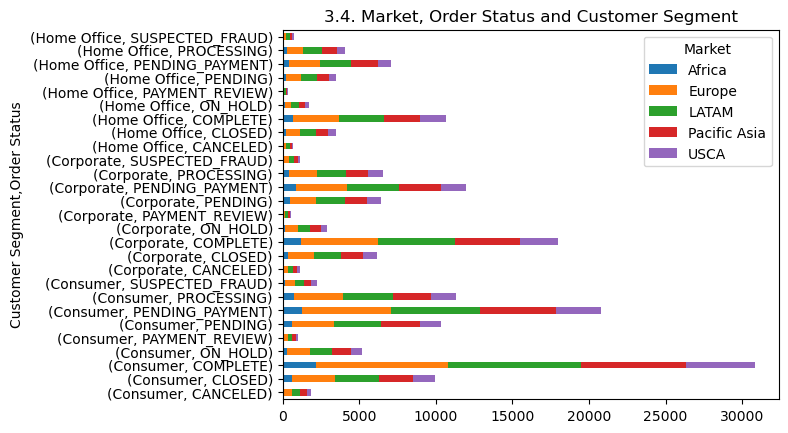

In [19]:
plt.figure(figsize=(25,15))
ds1 = ds.groupby(['Customer Segment','Market', 'Order Status'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='3.4. Market, Order Status and Customer Segment')

#### Observation:

<b>3.1:</b> LATAM has more market value followed by Europe with 1% behind. 

<b>3.2:</b> Suspected fraud sees to be more in Europe comparatively.

<b>3.3:</b> Suspected fraud is more in EE.UU than Puerto Rico.

<b>3.4:</b> USCA has a success of No Cancellation of Orders.

## 4. Discount per Product Analysis with respect to Department Name and Profit Loss

### 4.1. Distribution of Product Discounts

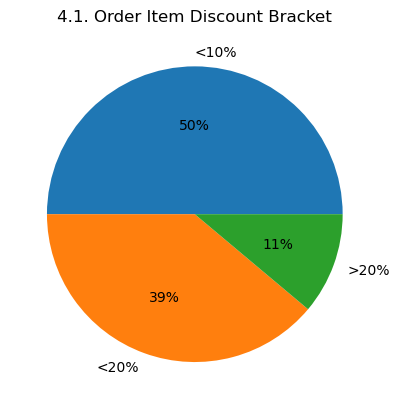

In [20]:
plt.pie(ds["Order Item Discount Bracket"].value_counts().values,labels=ds["Order Item Discount Bracket"].value_counts().index,  autopct='%.0f%%')
plt.title("4.1. Order Item Discount Bracket")
plt.show()

### 4.2. Distribution of Product Discounts with respect to Department Name

Text(0.5, 1.0, '4.2. Order Item Discount Bracket and Department Name')

<Figure size 2000x1000 with 0 Axes>

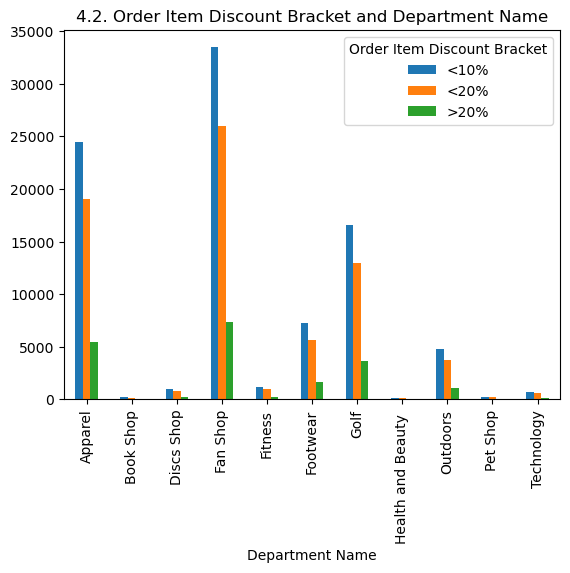

In [21]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Department Name','Order Item Discount Bracket'])['Sales'].count()
ds1.unstack(level=1).plot.bar()
plt.title("4.2. Order Item Discount Bracket and Department Name")

### 4.3. Distribution of Product Discounts with respect to Department Name and Profit Loss

<AxesSubplot:title={'center':'4.3. Order Item Discount Bracket, Department Name and Profit Loss'}, ylabel='BenefitBracket,Department Name'>

<Figure size 2000x1000 with 0 Axes>

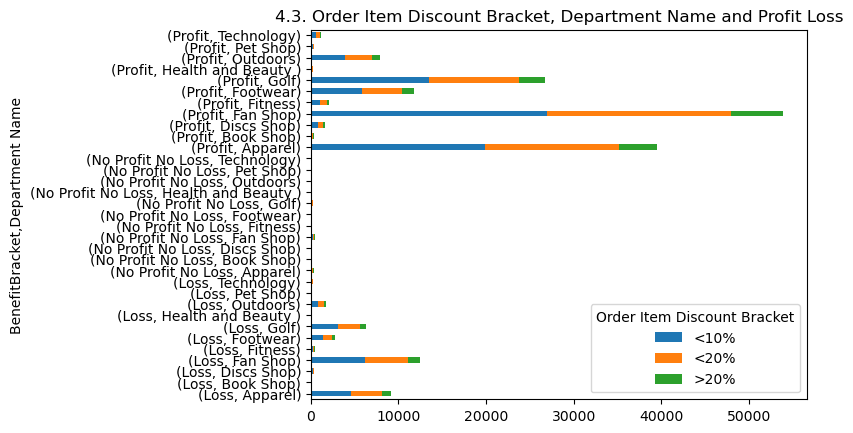

In [22]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['BenefitBracket', 'Order Item Discount Bracket','Department Name'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='4.3. Order Item Discount Bracket, Department Name and Profit Loss')

#### Observation:

<b>4.1:</b> Half of the discounts range less than 10%. 

<b>4.2:</b> Discounts of more than 20% is given to customers buying from Fan Shop.

<b>4.3:</b> Losses with respect to Book Shop, Pet Shop, Health and Beauty, does not have any discount rates. 

## 5. Mode of Shipment Analysis with respect to Market and Profit Loss

### 5.1. Distribution of Mode of Shipment

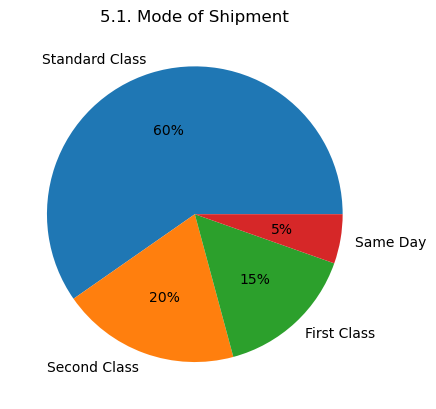

In [23]:
plt.pie(ds["Shipping Mode"].value_counts().values,labels=ds["Shipping Mode"].value_counts().index,  autopct='%.0f%%')
plt.title("5.1. Mode of Shipment")
plt.show()

### 5.2. Distribution of Mode of Shipment with respect to Profit Loss

Text(0.5, 1.0, '5.2. Mode of Shipment and Profit Loss')

<Figure size 2000x1000 with 0 Axes>

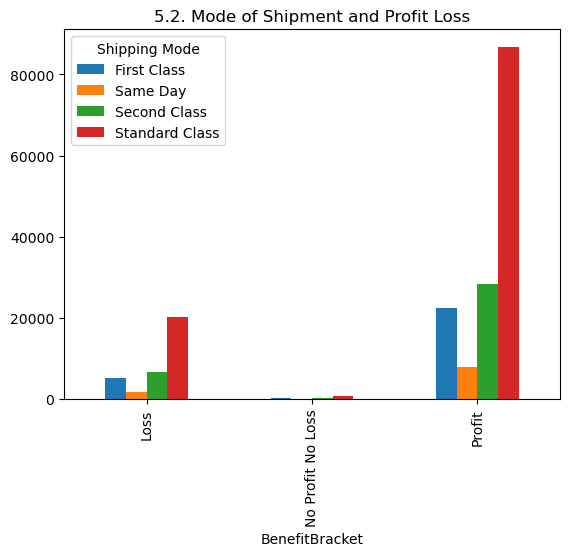

In [24]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['BenefitBracket','Shipping Mode'])['Sales'].count()
ds1.unstack(level=1).plot.bar()
plt.title("5.2. Mode of Shipment and Profit Loss")

### 5.3. Distribution of Mode of Shipment with respect to Profit Loss and Market

<AxesSubplot:title={'center':'5.3. Mode of Shipment, Profit Loss and Market'}, ylabel='Market,BenefitBracket'>

<Figure size 2000x1000 with 0 Axes>

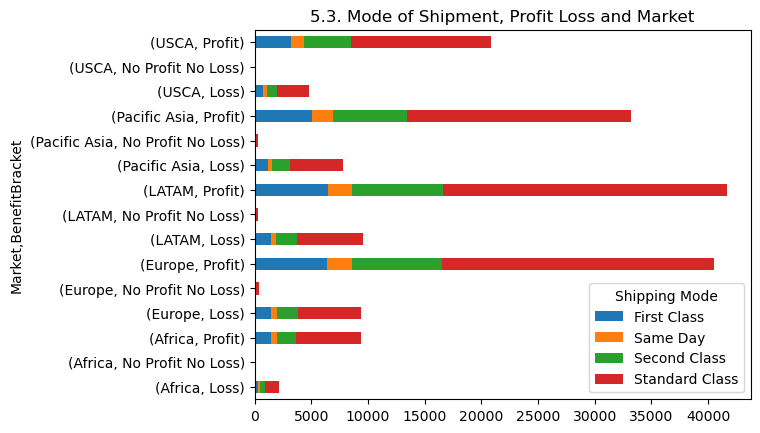

In [25]:
plt.figure(figsize=(20,10))
ds1 = ds.groupby(['Market','Shipping Mode','BenefitBracket'])['Sales'].count()
ds1.unstack(level=1).plot(kind= 'barh', stacked=True, title='5.3. Mode of Shipment, Profit Loss and Market')

#### Observation:

<b>5.1:</b> Majority of sales are from Standard class customers. 

<b>5.2:</b> More profits are gained from Standard class customers.

<b>5.3:</b> USCA and Africa has sales with either Profit or Loss but not with No Profit or Loss.